In [10]:
import pandas as pd
import numpy as np
import nltk
import nltk.sentiment.util
import matplotlib.pyplot as plt
import pprint
import re
import gensim
import gensim.corpora as corpora
import os
from gensim.utils import simple_preprocess
from nltk.corpus import stopwords

In [11]:
df = pd.read_csv("../../amazon_reviews_us_Grocery_v1_00.tsv", sep='\t', quoting=3)
df = df[["product_id", "star_rating", "review_body"]]
df

product_id  star_rating  \
0        B000SAQCWC            5   
1        B00509LVIQ            5   
2        B00KHXESLC            5   
3        B000F8JIIC            5   
4        B004ZWR9RQ            5   
...             ...          ...   
2402453  B00004TBB0            4   
2402454  B00000K1X9            5   
2402455  B00000K1X9            5   
2402456  B00000K1X9            5   
2402457  B00000K1X9            5   

                                               review_body  
0        As a family allergic to wheat, dairy, eggs, nu...  
1        My favorite nut.  Creamy, crunchy, salty, and ...  
2        This green tea tastes so good! My girlfriend l...  
3        I love Melissa's brand but this is a great sec...  
4                                                     good  
...                                                    ...  
2402453  The Amor Belhom Duo are likely the only musici...  
2402454  Being  a  Breyer  collecter  almost  all  of  ...  
2402455  This model is beautiful.  each model is hand p...  
2402456  As a person who has collected Breyers all my l...  
2402457  This Breyer horse is wonderful. She is beautif...  

[2402458 rows x 3 columns]

In [12]:
data = df.dropna()
data = data.query('star_rating < 4', engine='python')
data = data.sample(100000)
data

product_id  star_rating  \
923990   B005EX6L6U            1   
1560799  B00B1D1Z4U            1   
1785373  B004OCF3FC            3   
1581718  B00B9JLZSC            1   
1345277  B001M050VQ            1   
...             ...          ...   
1215489  B001D6KHT4            3   
1904715  B000CQG84E            1   
2073622  B000HQLDJ4            3   
142413   B0033TYF2E            3   
1517251  B004VLWM64            3   

                                               review_body  
923990   The nastiest cheapest tasting chocolate I ever...  
1560799  It arrived shades of pink and purple instead o...  
1785373  I've been eating dukkah for years, and just lo...  
1581718  My search on Amazon was for Verismo decaf pods...  
1345277  I recently took a look at the ingredients list...  
...                                                    ...  
1215489  I absolutely LOVE this product but don't be fo...  
1904715  these are absolutely horrible. no wonder why i...  
2073622  EDIT: This product is now packed in soybean oi...  
142413    Ingredients look healthy but the taste is so so.  
1517251  The crackers were all broken into pieces.  I l...  

[100000 rows x 3 columns]

In [13]:
#data['review_body'] = data['review_body'].map(lambda x: re.sub('[,\.!?]', '', x))
#data['review_body'] = data['review_body'].map(lambda x: x.lower())
data = data["review_body"]
data

923990     The nastiest cheapest tasting chocolate I ever...
1560799    It arrived shades of pink and purple instead o...
1785373    I've been eating dukkah for years, and just lo...
1581718    My search on Amazon was for Verismo decaf pods...
1345277    I recently took a look at the ingredients list...
                                 ...                        
1215489    I absolutely LOVE this product but don't be fo...
1904715    these are absolutely horrible. no wonder why i...
2073622    EDIT: This product is now packed in soybean oi...
142413      Ingredients look healthy but the taste is so so.
1517251    The crackers were all broken into pieces.  I l...
Name: review_body, Length: 100000, dtype: object

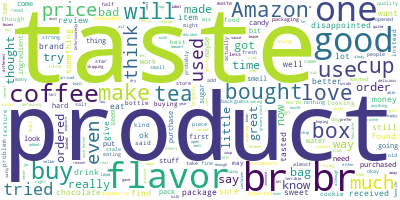

In [14]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(data.values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

In [15]:
stop_words = stopwords.words('english')
stop_words.extend(['br','[', ',', '\\', '.', '!', '?', ']', '<', '>', '$', '£', '/', '*', '(', ')', '%', '^', '&', '-', '_', '=', '+', '|', '#','~',';',':','...',"''",'//','\\\\',"n't","'ve","'m","'s","'"])

def sent_to_words(sentences):
    for sentence in sentences:
        yield(nltk.word_tokenize(str(sentence)))
        
def remove_stopwords(texts):
    return [[(te,ta) for (te,ta) in doc if (te.replace("_NEG","") not in stop_words)] for doc in texts]

data_filtered = data
data_words = list(sent_to_words(data_filtered))
# remove stop words
#data_words = remove_stopwords(data_words)
pprint.pprint(data_words[:5])
#np.array(data_words[0], dtype=object).shape

[['The',
  'nastiest',
  'cheapest',
  'tasting',
  'chocolate',
  'I',
  'ever',
  'had',
  ',',
  'what',
  'a',
  'disappointment',
  '!',
  '!',
  'All',
  'I',
  'can',
  'say',
  'about',
  'the',
  'positive',
  'reviewers',
  'here',
  'is',
  'they',
  'must',
  'have',
  'never',
  'have',
  'tasted',
  'chocolates',
  'such',
  'as',
  'Hersheys',
  ',',
  'Cadburys',
  ',',
  'etc',
  '........',
  'YUCK'],
 ['It',
  'arrived',
  'shades',
  'of',
  'pink',
  'and',
  'purple',
  'instead',
  'of',
  'black',
  'and',
  'white',
  '.',
  'Bummer',
  '.',
  'I',
  'sent',
  'it',
  'back',
  '.',
  'Probably',
  'a',
  'good',
  'idea',
  'to',
  'look',
  'at',
  'it',
  'before',
  'shipping',
  '.'],
 ['I',
  "'ve",
  'been',
  'eating',
  'dukkah',
  'for',
  'years',
  ',',
  'and',
  'just',
  'love',
  'it',
  '.',
  'So',
  'far',
  'I',
  "'ve",
  'always',
  'made',
  'my',
  'own',
  '[',
  'some',
  'recipes',
  'are',
  'on',
  'line',
  ']',
  'and',
  'home-ma

In [16]:
data_words = [[word.lower() for word in data_point] for data_point in data_words]
data_words

[['the',
  'nastiest',
  'cheapest',
  'tasting',
  'chocolate',
  'i',
  'ever',
  'had',
  ',',
  'what',
  'a',
  'disappointment',
  '!',
  '!',
  'all',
  'i',
  'can',
  'say',
  'about',
  'the',
  'positive',
  'reviewers',
  'here',
  'is',
  'they',
  'must',
  'have',
  'never',
  'have',
  'tasted',
  'chocolates',
  'such',
  'as',
  'hersheys',
  ',',
  'cadburys',
  ',',
  'etc',
  '........',
  'yuck'],
 ['it',
  'arrived',
  'shades',
  'of',
  'pink',
  'and',
  'purple',
  'instead',
  'of',
  'black',
  'and',
  'white',
  '.',
  'bummer',
  '.',
  'i',
  'sent',
  'it',
  'back',
  '.',
  'probably',
  'a',
  'good',
  'idea',
  'to',
  'look',
  'at',
  'it',
  'before',
  'shipping',
  '.'],
 ['i',
  "'ve",
  'been',
  'eating',
  'dukkah',
  'for',
  'years',
  ',',
  'and',
  'just',
  'love',
  'it',
  '.',
  'so',
  'far',
  'i',
  "'ve",
  'always',
  'made',
  'my',
  'own',
  '[',
  'some',
  'recipes',
  'are',
  'on',
  'line',
  ']',
  'and',
  'home-ma

In [17]:
import nltk.sentiment.util
tokens = list(map(nltk.word_tokenize, data))
negated_tokens = list(map(nltk.sentiment.util.mark_negation, tokens))
data = negated_tokens

In [18]:
#print(data_words)
def tag(texts):
    #tokens = list(map(nltk.word_tokenize, texts))
    tagged = [nltk.pos_tag(text, tagset='universal') for text in texts]
    negated_tokens = list(map(nltk.sentiment.util.mark_negation, texts))
    negated_tagged = [[(negated_tokens[i][j], tagged[i][j][1]) for j in range(len(texts[i]))] for i in range(len(texts))]
    return negated_tagged
negated_tagged = tag(data_words)
negated_tagged

[[('the', 'DET'),
  ('nastiest', 'ADJ'),
  ('cheapest', 'NOUN'),
  ('tasting', 'VERB'),
  ('chocolate', 'NOUN'),
  ('i', 'NOUN'),
  ('ever', 'ADV'),
  ('had', 'VERB'),
  (',', '.'),
  ('what', 'PRON'),
  ('a', 'DET'),
  ('disappointment', 'NOUN'),
  ('!', '.'),
  ('!', '.'),
  ('all', 'DET'),
  ('i', 'NOUN'),
  ('can', 'VERB'),
  ('say', 'VERB'),
  ('about', 'ADP'),
  ('the', 'DET'),
  ('positive', 'ADJ'),
  ('reviewers', 'NOUN'),
  ('here', 'ADV'),
  ('is', 'VERB'),
  ('they', 'PRON'),
  ('must', 'VERB'),
  ('have', 'VERB'),
  ('never', 'ADV'),
  ('have_NEG', 'VERB'),
  ('tasted_NEG', 'VERB'),
  ('chocolates_NEG', 'NOUN'),
  ('such_NEG', 'ADJ'),
  ('as_NEG', 'ADP'),
  ('hersheys_NEG', 'NOUN'),
  (',_NEG', '.'),
  ('cadburys_NEG', 'NOUN'),
  (',_NEG', '.'),
  ('etc_NEG', 'X'),
  ('........_NEG', 'NUM'),
  ('yuck_NEG', 'NOUN')],
 [('it', 'PRON'),
  ('arrived', 'VERB'),
  ('shades', 'NOUN'),
  ('of', 'ADP'),
  ('pink', 'NOUN'),
  ('and', 'CONJ'),
  ('purple', 'ADJ'),
  ('instead', 'ADV')

In [19]:
data_words = remove_stopwords(negated_tagged)
data_words

[[('nastiest', 'ADJ'),
  ('cheapest', 'NOUN'),
  ('tasting', 'VERB'),
  ('chocolate', 'NOUN'),
  ('ever', 'ADV'),
  ('disappointment', 'NOUN'),
  ('say', 'VERB'),
  ('positive', 'ADJ'),
  ('reviewers', 'NOUN'),
  ('must', 'VERB'),
  ('never', 'ADV'),
  ('tasted_NEG', 'VERB'),
  ('chocolates_NEG', 'NOUN'),
  ('hersheys_NEG', 'NOUN'),
  ('cadburys_NEG', 'NOUN'),
  ('etc_NEG', 'X'),
  ('........_NEG', 'NUM'),
  ('yuck_NEG', 'NOUN')],
 [('arrived', 'VERB'),
  ('shades', 'NOUN'),
  ('pink', 'NOUN'),
  ('purple', 'ADJ'),
  ('instead', 'ADV'),
  ('black', 'ADJ'),
  ('white', 'ADJ'),
  ('bummer', 'NOUN'),
  ('sent', 'VERB'),
  ('back', 'PRT'),
  ('probably', 'ADV'),
  ('good', 'ADJ'),
  ('idea', 'NOUN'),
  ('look', 'VERB'),
  ('shipping', 'VERB')],
 [('eating', 'VERB'),
  ('dukkah', 'NOUN'),
  ('years', 'NOUN'),
  ('love', 'VERB'),
  ('far', 'ADV'),
  ('always', 'ADV'),
  ('made', 'VERB'),
  ('recipes', 'NOUN'),
  ('line', 'NOUN'),
  ('home-made', 'NOUN'),
  ('course', 'NOUN'),
  ('even', 'ADV

In [20]:
#gets adjectives

def get_adjectives(tagged):
    review_a = [word for (word, tag) in tagged if (tag == 'ADJ')]# or tag == 'ADV' or tag == 'NOUN' or tag == 'VERB')]
    return review_a

data_words = list(map(lambda x: get_adjectives(x), data_words))

'''
for i in range(len(data_words)):
    data_words[i] = [word for (word,tag) in data_words[i]]
'''
data_words


[['nastiest', 'positive'],
 ['purple', 'black', 'white', 'good'],
 ['fenugreek', 'whole', 'less_NEG', 'small_NEG', 'good', 'prepared'],
 ['verismo', 'decaf_NEG', 'disappointed_NEG', 'sure', 'good'],
 ['good_NEG', 'interested_NEG', 'healthy_NEG'],
 ['enough_NEG', 'expensive'],
 ['strange', 'strange', 'lemon'],
 ['good'],
 ['cough', 'like_NEG', 'favorite_NEG'],
 [],
 ['boring', 'flavored', 'overpowering'],
 ['little', 'sure_NEG'],
 ['write_NEG', 'horrible_NEG'],
 ['flex',
  'k-cup',
  'crazy',
  'crazy',
  'harder',
  'little_NEG',
  'sure',
  'different_NEG'],
 ['horrible', 'several', 'sure', 'bad', 'small'],
 ['great', 'plastic', 'native', 'bpa', 'free', 'bpa_NEG', 'free_NEG'],
 ['hard_NEG', 'multi-use', 'easy_NEG', 'better', 'single'],
 [],
 ['isolated'],
 ['alternative', 'much', 'weak', 'smaller', 'different'],
 ['best', 'general', 'good', 'main', 'jarred', 'sure_NEG', 'cheap', 'easy'],
 ['sweet', 'sweet'],
 ['high', 'hungry', 'curbs'],
 ['little', 'bigger'],
 [],
 ['much', 'thicker'

In [21]:
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
pprint.pprint(corpus[:5])

[[(0, 1), (1, 1)],
 [(2, 1), (3, 1), (4, 1), (5, 1)],
 [(3, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1)],
 [(3, 1), (11, 1), (12, 1), (13, 1), (14, 1)],
 [(15, 1), (16, 1), (17, 1)]]


In [46]:
# number of topics
num_topics = 50
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics,
                                       minimum_probability=0.1,
                                       workers=3,
                                       passes=2)
# Print the Keyword in the 10 topics
pprint.pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

C:\Users\MattW\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



[(1,
  '0.348*"much" + 0.044*"better" + 0.039*"larger" + 0.030*"ridiculous" + '
  '0.030*"dried" + 0.028*"good" + 0.023*"full" + 0.023*"little" + 0.023*"cute" '
  '+ 0.023*"cheaper"'),
 (42,
  '0.259*"bad" + 0.087*"nasty" + 0.072*"single" + 0.032*"enough" + '
  '0.029*"dead" + 0.024*"major" + 0.013*"good" + 0.012*"nut" + 0.011*"pecan" + '
  '0.011*"free_NEG"'),
 (43,
  '0.140*"original" + 0.058*"stronger" + 0.046*"k-cup" + 0.035*"oz" + '
  '0.033*"bubble" + 0.033*"like_NEG" + 0.030*"next" + 0.028*"convenient" + '
  '0.020*"tried" + 0.017*"usual_NEG"'),
 (32,
  '0.087*"special_NEG" + 0.074*"plastic" + 0.050*"usual" + 0.026*"inferior" + '
  '0.022*"correct" + 0.021*"it." + 0.018*"creamy_NEG" + 0.017*"interested" + '
  '0.017*"perfect_NEG" + 0.017*"right"'),
 (35,
  '0.185*"fine" + 0.100*"open" + 0.066*"instant" + 0.048*"bigger" + '
  '0.040*"black_NEG" + 0.029*"double" + 0.028*"chinese" + 0.022*"japanese" + '
  '0.017*"instant_NEG" + 0.016*"returnable_NEG"'),
 (31,
  '0.242*"hot" + 0.092

In [47]:
# copied from site https://www.machinelearningplus.com/nlp/topic-modeling-visualization-how-to-present-results-lda-models/ 
# please do not use if not modifiable

def format_topics_sentences(ldamodel=None, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data_words)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(10)


C:\Users\MattW\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Document_No  Dominant_Topic  Topic_Perc_Contrib  \
0            0            10.0              0.3400   
1            1            48.0              0.2128   
2            2            17.0              0.2486   
3            3            22.0              0.2522   
4            4            12.0              0.2566   
5            5            40.0              0.3405   
6            6             9.0              0.5050   
7            7            23.0              0.5100   
8            8            17.0              0.2570   
9            9            11.0              0.2550   

                                            Keywords  \
0  due, natural, coconut, positive, natural_NEG, ...   
1  black, strong_NEG, enough_NEG, favorite_NEG, e...   
2  strong, worst, different_NEG, first_NEG, stale...   
3  whole, healthy, whole_NEG, flat, average, nutr...   
4  much_NEG, cheese, quick, loose, less_NEG, good...   
5  great, expensive, happy_NEG, dry, big_NEG, per...   
6  delicious, wonderful, super, strange, wrong_NE...   
7  good, fat, little, overall, better, strong, hi...   
8  strong, worst, different_NEG, first_NEG, stale...   
9  good_NEG, gross, odd, flavored, raw, bad_NEG, ...   

                                                Text  
0                               [nastiest, positive]  
1                       [purple, black, white, good]  
2  [fenugreek, whole, less_NEG, small_NEG, good, ...  
3  [verismo, decaf_NEG, disappointed_NEG, sure, g...  
4            [good_NEG, interested_NEG, healthy_NEG]  
5                            [enough_NEG, expensive]  
6                          [strange, strange, lemon]  
7                                             [good]  
8                    [cough, like_NEG, favorite_NEG]  
9                                                 []

In [104]:
topics = lda_model.show_topics(num_topics=50,formatted=False)

C:\Users\MattW\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [105]:
topics

C:\Users\MattW\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



[(0,
  [('light', 0.11801211),
   ('top', 0.08531701),
   ('extra_NEG', 0.036069375),
   ('....', 0.034074046),
   ('good', 0.030082393),
   ('poor_NEG', 0.028529624),
   ('pricey', 0.02562896),
   ('additional', 0.021002214),
   ('live', 0.01735136),
   ('severe', 0.017145649)]),
 (1,
  [('much', 0.34840474),
   ('better', 0.044489495),
   ('larger', 0.03869312),
   ('ridiculous', 0.030229293),
   ('dried', 0.029843166),
   ('good', 0.028393917),
   ('full', 0.023444204),
   ('little', 0.023196792),
   ('cute', 0.02296708),
   ('cheaper', 0.022681683)]),
 (2,
  [('sweet', 0.28972358),
   ('ok', 0.23398903),
   ('sweet_NEG', 0.08698039),
   ('better', 0.013160716),
   ('messy', 0.01152281),
   ('little', 0.011514509),
   ('first', 0.008452405),
   ('medicinal', 0.008266393),
   ('less', 0.0076814755),
   ('update', 0.0072889724)]),
 (3,
  [('great_NEG', 0.24059428),
   ('like', 0.053046834),
   ('popcorn', 0.046968516),
   ('unable', 0.033598233),
   ('outside', 0.020547315),
   ('gold

In [106]:
topic_words = dict(topics[0][1]) ##change as required per topic

C:\Users\MattW\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [107]:
cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  max_words=30,
                  prefer_horizontal=1.0)
cloud.generate_from_frequencies(topic_words)

C:\Users\MattW\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



C:\Users\MattW\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



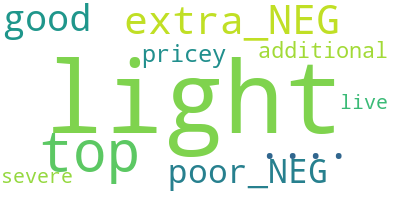

In [108]:
cloud.to_image()

In [109]:
from collections import Counter

C:\Users\MattW\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [110]:
indi_word = [word for sent in data_words for word in sent]
counter = Counter(indi_word)

out = []
for i, topic in topics:
    print(i)
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


C:\Users\MattW\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [111]:
df_words = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])  

C:\Users\MattW\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [127]:
df_plot = df_words[df_words['topic_id'] == 26] #change as required per topic

C:\Users\MattW\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [128]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

C:\Users\MattW\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [129]:
def plot_bars(df, xtitle, ytitle, title):
    
    fig = make_subplots(specs=[[{"secondary_y": True}]])
    
    fig.add_trace(
    go.Bar(x=df['word'], y=df['word_count'],opacity=1, width= 0.3,name=ytitle,marker_color = 'coral'),
    secondary_y=False)

    fig.add_trace(
        go.Bar(x=df['word'], y=df['importance'],opacity=0.5,width = 0.6, name= 'Weightage',marker_color = 'coral'),
        secondary_y=True)

    # Add figure title
    fig.update_layout(
        xaxis_title = xtitle,
        title_text = title
    )
    
    return fig

C:\Users\MattW\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [130]:
plot_bars(df_plot,xtitle = 'Words',ytitle='Word Count',title='Word count and weights of words in Topic 26')

C:\Users\MattW\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [120]:
pprint.pprint(lda_model.print_topics(num_topics=100))

[(0,
  '0.118*"light" + 0.085*"top" + 0.036*"extra_NEG" + 0.034*"...." + '
  '0.030*"good" + 0.029*"poor_NEG" + 0.026*"pricey" + 0.021*"additional" + '
  '0.017*"live" + 0.017*"severe"'),
 (1,
  '0.348*"much" + 0.044*"better" + 0.039*"larger" + 0.030*"ridiculous" + '
  '0.030*"dried" + 0.028*"good" + 0.023*"full" + 0.023*"little" + 0.023*"cute" '
  '+ 0.023*"cheaper"'),
 (2,
  '0.290*"sweet" + 0.234*"ok" + 0.087*"sweet_NEG" + 0.013*"better" + '
  '0.012*"messy" + 0.012*"little" + 0.008*"first" + 0.008*"medicinal" + '
  '0.008*"less" + 0.007*"update"'),
 (3,
  '0.241*"great_NEG" + 0.053*"like" + 0.047*"popcorn" + 0.034*"unable" + '
  '0.021*"outside" + 0.018*"golden" + 0.016*"toxic" + 0.014*"ive" + '
  '0.014*"handy" + 0.013*"good"'),
 (4,
  '0.147*"dark" + 0.119*"okay" + 0.108*"cheaper" + 0.031*"huge_NEG" + '
  '0.017*"good" + 0.015*"dangerous" + 0.012*"absolute" + 0.012*"obvious" + '
  '0.012*"balsamic" + 0.010*"local"'),
 (5,
  '0.358*"disappointed" + 0.115*"large" + 0.037*"thick" + 

C:\Users\MattW\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [121]:
from itertools import chain
lda_corpus = lda_model[corpus]

# Find the threshold, let's set the threshold to be 1/#clusters,
# To prove that the threshold is sane, we average the sum of all probabilities:
scores = list(chain(*[[score for topic_id,score in topic] for topic in [doc for doc in lda_corpus]]))
threshold = sum(scores)/len(scores)


C:\Users\MattW\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [122]:
import pickle 
import pyLDAvis
import pyLDAvis.gensim_models
data_vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)

pyLDAvis.display(data_vis)

C:\Users\MattW\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [39]:
print(threshold)

0.3310758618751995


C:\Users\MattW\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [40]:
'''cluster1 = [j for i,j in zip(lda_corpus[:100],texts[:100]) if i[0][1] > threshold]
print(1)
cluster2 = [j for i,j in zip(lda_corpus[:100],texts[:100]) if i[1][1] > threshold]
print(2)
cluster3 = [j for i,j in zip(lda_corpus[:100],texts[:100]) if i[2][1] > threshold]
print(3)
'''

C:\Users\MattW\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



'cluster1 = [j for i,j in zip(lda_corpus[:100],texts[:100]) if i[0][1] > threshold]\nprint(1)\ncluster2 = [j for i,j in zip(lda_corpus[:100],texts[:100]) if i[1][1] > threshold]\nprint(2)\ncluster3 = [j for i,j in zip(lda_corpus[:100],texts[:100]) if i[2][1] > threshold]\nprint(3)\n'

In [41]:
'''print(cluster1[:100], "\n \n")
print(cluster2[:100], "\n \n")
print(cluster3[:100], "\n")
'''

C:\Users\MattW\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



'print(cluster1[:100], "\n \n")\nprint(cluster2[:100], "\n \n")\nprint(cluster3[:100], "\n")\n'